Demo2 - Bi-variate regression
Problemă: Ce îi poate face pe oameni fericiți?
Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de libertate, etc.

Folsind datele aferente anului 2017 link, să se realizeze o predicție a gradului de fericire în funcție:

- de Produsul intern brut si
- de gradul de libertate.

Metodologie pentru aplicarea GD pentru estimarea fericirii

Tipuri de regresie:

- univariata – flow similar cu lab-ul precedent: (Demo1)
- bivariata – flow similar cu lab-ul precedent, dar apare in plus necesitatea normalizarii datelor (DGP-ul si Freedom-ul pot avea unitati de masura diferite):

Normalizare datelor pt GDP si Freedom din regresia bivariata folosind tool-ul Standard Skaler din sklearn link

Algoritm de regresie:

Live: SGDRegressor din sklearn link
Live: SGDRegressor propriu

Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

In [7]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from math import sqrt

In [18]:
def plot3Ddata(x1Train, x2Train, yTrain,
               x1Model=None, x2Model=None, yModel=None,
               x1Test=None, x2Test=None, yTest=None,
               title=None):
    from mpl_toolkits import mplot3d
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # Plot TRAIN
    ax.scatter(x1Train, x2Train, yTrain, c='red', marker='o', label='train data')

    # Plot TEST, dacă e prezent
    if x1Test is not None and len(x1Test) > 0:
        ax.scatter(x1Test, x2Test, yTest, c='green', marker='^', label='test data')

    # Plot MODEL, dacă e prezent
    if x1Model is not None and len(x1Model) > 0:
        ax.scatter(x1Model, x2Model, yModel, c='blue', marker='*', label='learnt model')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()


In [13]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

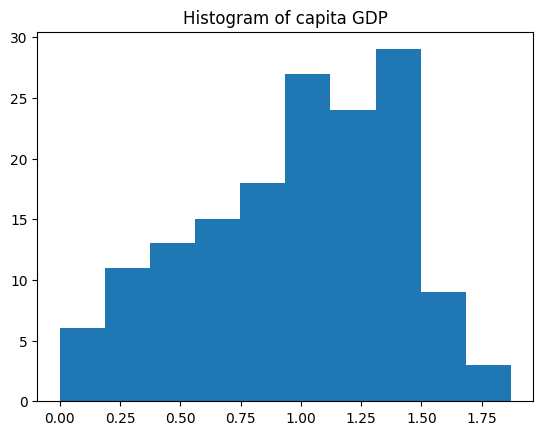

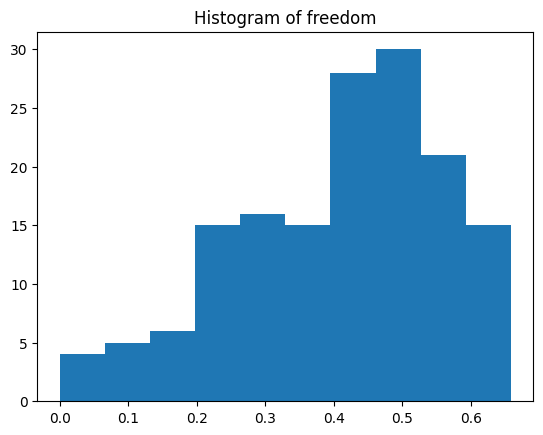

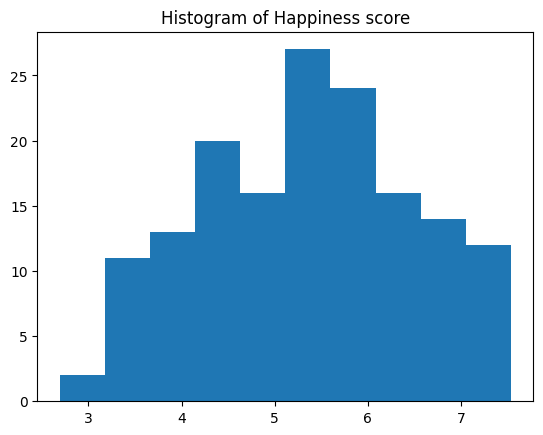

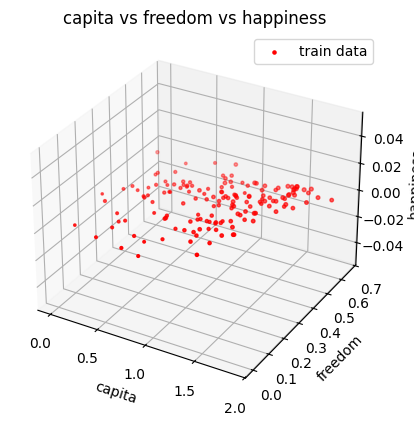

In [14]:
# problem hapiness = w0 + w1 * GDPcapita + w2 * freedom
# load data
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

Pasul 2 - impartire date pe train si test si normalizare

In [15]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]

        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data

        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

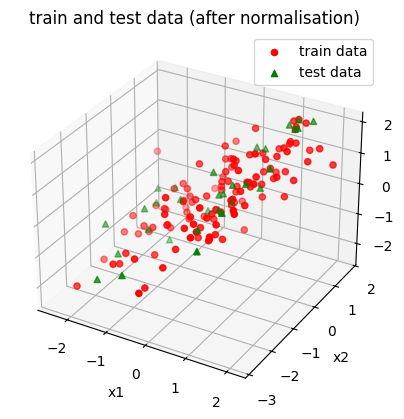

In [19]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

plot3Ddata(
    feature1train, feature2train, trainOutputs,
    None, None, None,  # <- în loc de [] pe model
    feature1test, feature2test, testOutputs,
    "train and test data (after normalisation)"
)

Pasul 3 - invatare model (cu tool sau cod propriu)

In [20]:
# identify (by training) the regressor

# # use sklearn regressor
# from sklearn import linear_model
# regressor = linear_model.SGDRegressor()

# using developed code
from SGD import MySGDRegression
# model initialisation
regressor = MySGDRegression()

regressor.fit(trainInputs, trainOutputs)
# print(regressor.coef_)
# print(regressor.intercept_)

#parameters of the liniar regressor
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2' )

the learnt model: f(x) =  -0.0014527924544318889  +  0.6978631617347402  * x1 +  0.30375393537641193  * x2


Pasul 4 - plot rezultate (model invatat, predictii)

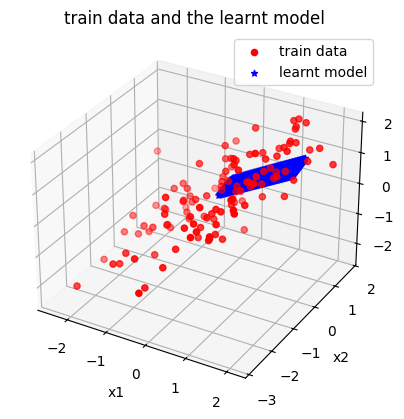

In [21]:
#numerical representation of the regressor model
noOfPoints = 50
xref1 = []
val = min(feature1)
step1 = (max(feature1) - min(feature1)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2)
step2 = (max(feature2) - min(feature2)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model')

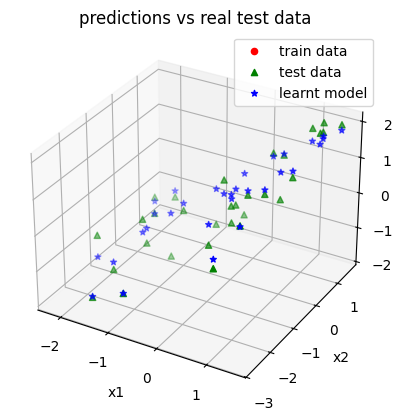

In [22]:
# use the trained model to predict new inputs

# makes predictions for test data
# computedTestOutputs = [w0 + w1 * el[0] + w2 * el[1] for el in testInputs]
# makes predictions for test data (by tool)
computedTestOutputs = regressor.predict(testInputs)

plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')

Pasul 5 - calcul metrici de performanta (eroarea)

In [23]:
#compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):   ', error)

prediction error (manual):  0.2331793993161317
prediction error (tool):    0.23317939931613166
